<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b> Ciencias de la computación e Inteligencia Artificial </b>
<br>
<i><b>Autor:</b></i>
<br>
 - Juan Pablo Blanco Márquez
 <br>
juan.blanco01@usa.edu.co
 <br>
<i><b>Docente:</b></i> John Corredor
<br>
<i><b>Asignatura:</b></i> HPC
<br>
<i><b>TEMA: Parcial #3</b></i> 
<br>
23/11/22
<br>
</FONT>
</div>

## **Abstract**

The objective of this paper is to evaluate the performance of a linear regression model created to predict computer prices based on its software and hardware characteristics, as well as to compare the performance of a regression model created in C++ and another one in Python implementing the ScikitLearn library. 

## **Introducción**

El mundo de hoy se encuentra inmerso con una gran cantidad de datos sobre todo lo que nos rodea, esto debido al furor de la cuarta revolución industrial, es por esto que haciendo uso de los datos se pueden realizar estudios y tomar decisiones al respecto. Hoy en día con toda la información recolectada de diferentes ámbitos se puede predecir el comportamiento de una variable como el precio de un computador basado en ciertas características como por ejemplo su marca y procesador, esto es posible gracias a la implementación de modelos predictivos como lo es la regresión lineal. Este es un poderoso modelo el cual se utiliza para predecir el valor de una variable según los valores de otras. La variable que se desea predecir se denomina variable dependiente y las variable que se están utilizando para predecir se denominan variables independientes. Al implementar el modelo hay que buscar que cuente con el mayor de los rendimientos puesto que el costo computacional es algo que hay que cuidar, por está razón en este documente se realizará la implementación de un modelo de regresión lineal tanto en Python (usando Scikit-Learn) y C++.

## **Objetivo General**

- Modelar las predicciones basadas en la Regresión Lineal.

## **Objetivos Específicos**

- Seleccionar un dataset (único por ingeniero)
- Hacer una análitica de datos sobre el dataset seleccionado
- Modelar usando la regresión lineal por medio de Python,  Scikit-Learn
- Modelar usando la regresión lineal por medio de C++
- Comparar los modelos



---



## **Desarrollo**

En primera instancia se importará cada una de las bibliotecas necesarias para el proyecto.

In [2]:
# Biblioteca para machine learning y lectura de Dataframe
import pandas as pd
# Biblioteca para operaciones matemáticas
import numpy as np
# Bibliotecas para la realización de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
# Biblioteca de escalado de datos
from sklearn.preprocessing import StandardScaler
# Importación del método para separar los datos train y test
from sklearn.model_selection import train_test_split 
# Biblioteca de Regresión lineal
from sklearn.linear_model import LinearRegression
# Pipeline 
from sklearn.pipeline import Pipeline
# Métrica de rendimiento
from sklearn.metrics import r2_score 

El dataset seleccionado para esta ocasión ha sido [Computer price prediction](https://www.kaggle.com/code/jonathanbouchet/computer-price-prediction/data), este conjunto de datos nos brinda el precio de un computador dadas sus diferentes características.

In [3]:
# A continuación se leerá el dataset por medio de pandas
df = pd.read_csv('https://raw.githubusercontent.com/juanpa54/HPC/main/Parcial3/Computers.csv', delimiter=',', index_col=False)

### **1. Análisis Exploratorio de Datos**

In [4]:
df

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...,...
6254,6255,1690,100,528,8,15,no,no,yes,39,35
6255,6256,2223,66,850,16,15,yes,yes,yes,39,35
6256,6257,2654,100,1200,24,15,yes,no,yes,39,35
6257,6258,2195,100,850,16,15,yes,no,yes,39,35


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6259 non-null   int64 
 1   price       6259 non-null   int64 
 2   speed       6259 non-null   int64 
 3   hd          6259 non-null   int64 
 4   ram         6259 non-null   int64 
 5   screen      6259 non-null   int64 
 6   cd          6259 non-null   object
 7   multi       6259 non-null   object
 8   premium     6259 non-null   object
 9   ads         6259 non-null   int64 
 10  trend       6259 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


Se observa que el dataset NO cuenta con datos nulos lo cual es muy importante revisar a la hora de tratar los datos, y también se observa que cuenta con tres variables categóricas (*cd*, *multi* y *premium*) de las cuales puede tomar los valores de *yes*/*no*.

Se eliminará la columna *Unnamed: 0* ya que solamente es un identificador y no nos aportará a la realización de predicciones.

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35


In [66]:
df.describe()

,price,speed,hd,ram,screen,ads,trend,cd,multi,premium
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985,0.464611,0.139479,0.902221
std,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984,0.498786,0.346474,0.297040
min,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000,0.000000,0.000000,0.000000
25%,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000,0.000000,0.000000,1.000000
50%,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000,0.000000,0.000000,1.000000
75%,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000,1.000000,0.000000,1.000000
max,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000,1.000000,1.000000,1.000000


Se evidencia que los valores de los precios de los computadores oscilan entre los 949 a 5399 USD, y en promedio la mayoría de las muestras del dataset se encuentran en precios que se aproximan a 2219 USD. 

A continuación se transformarán las variables categóricas a numéricas por medio de la función de pandas *get_dummies* la cual genera nuevas columnas por cada valor que puede tomar la variable y coloca 0s en el caso que no tome el valor de la columna o 1s en el caso de que sí lo tome.

In [17]:
df = pd.get_dummies(df, columns = ["cd","multi","premium"])

In [18]:
df

,price,speed,hd,ram,screen,ads,trend,cd_no,cd_yes,multi_no,multi_yes,premium_no,premium_yes
0,1499,25,80,4,14,94,1,1,0,1,0,0,1
1,1795,33,85,2,14,94,1,1,0,1,0,0,1
2,1595,25,170,4,15,94,1,1,0,1,0,0,1
3,1849,25,170,8,14,94,1,1,0,1,0,1,0
4,3295,33,340,16,14,94,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,1,0,1,0,0,1
6255,2223,66,850,16,15,39,35,0,1,0,1,0,1
6256,2654,100,1200,24,15,39,35,0,1,1,0,0,1
6257,2195,100,850,16,15,39,35,0,1,1,0,0,1


Como se puede observar se crearon las nuevas columnas, de ellas se eliminarán las de valor 'no' y de esta forma quedarán las columnas donde los valores de 1s indiquen 'yes'.

In [19]:
df.drop(['cd_no', 'multi_no','premium_no'], axis=1, inplace=True)

In [20]:
df

,price,speed,hd,ram,screen,ads,trend,cd_yes,multi_yes,premium_yes
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,0,0,1
6255,2223,66,850,16,15,39,35,1,1,1
6256,2654,100,1200,24,15,39,35,1,0,1
6257,2195,100,850,16,15,39,35,1,0,1


A continuación se renombrarán las variables a su nombre original.

In [21]:
df = df.rename(columns={'cd_yes':'cd',
                        'multi_yes':'multi',
                        'premium_yes': 'premium'})

In [22]:
df

,price,speed,hd,ram,screen,ads,trend,cd,multi,premium
0,1499,25,80,4,14,94,1,0,0,1
1,1795,33,85,2,14,94,1,0,0,1
2,1595,25,170,4,15,94,1,0,0,1
3,1849,25,170,8,14,94,1,0,0,0
4,3295,33,340,16,14,94,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35,0,0,1
6255,2223,66,850,16,15,39,35,1,1,1
6256,2654,100,1200,24,15,39,35,1,0,1
6257,2195,100,850,16,15,39,35,1,0,1


Ahora se graficará un mapa de correlación.

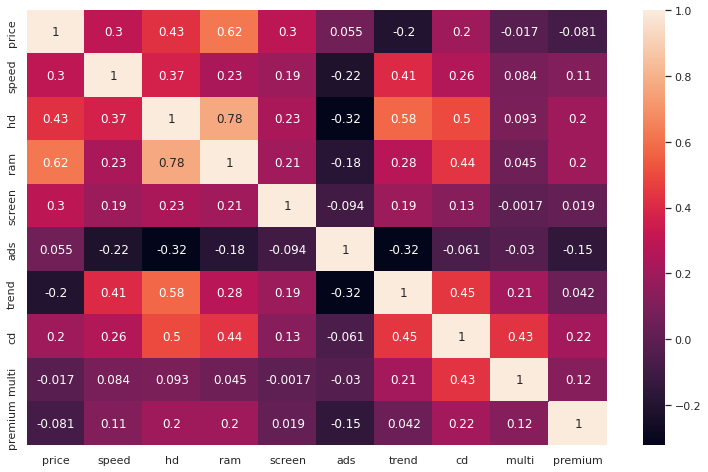

In [68]:
sns.set(rc = {'figure.figsize': (13,8)})
sns.heatmap(df.corr(), annot=True)
plt.show()

Se puede observar que existe una alta relación entre el espacio de la memoria ram y el precio del computador, al igual que el espacio del dico rígido hd. Estas relaciones son positivas puesto que se espera que a mayor espacio mayor precio tendrá el computador.

Ahora se mostrará un histograma con la distribución de las variables.

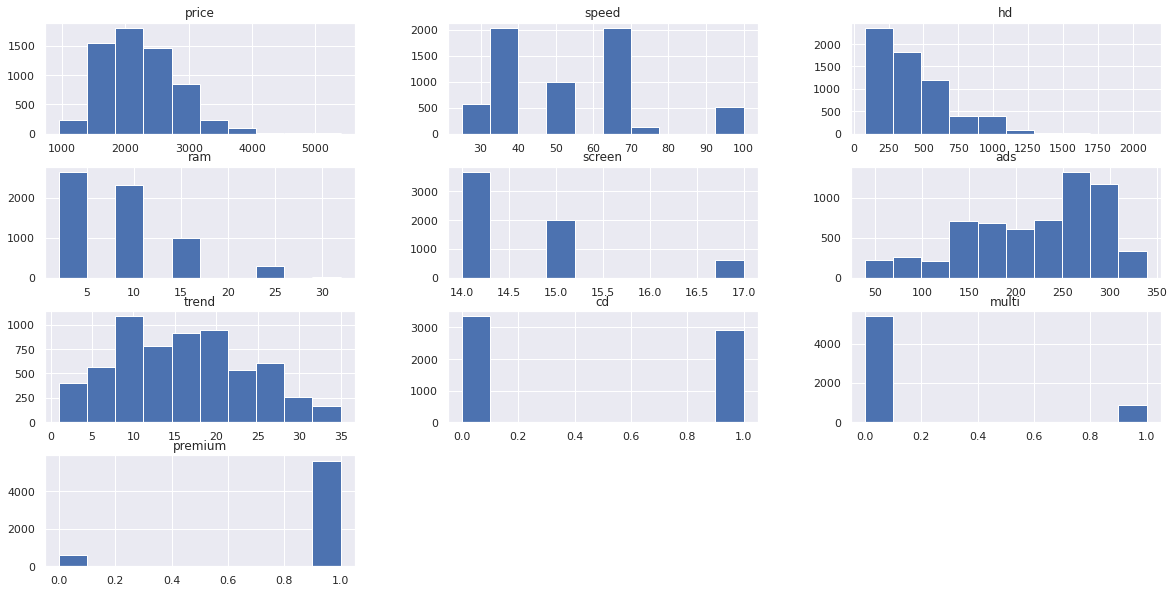

In [72]:
df.hist(figsize=(20,10))
plt.show()

Se logra ver que la mayoría de los computadores cuestan entre 1500 y 2000 dólares, además la gran parte de los mismos tienen una pantalla de 14 pulgadas.

### **2. Selección de métrica de rendimiento**

En esta ocasión se utilizará el coeficiente de determinación  o R² ya que es una medida que se puede usar para evaluar un modelo con la ventaja de estar libre de escala, esto quiere decir que no importa si los valores de salida son muy grandes o muy pequeños, el R² siempre estará entre 0 y 1.

### **3. Modelo de Regresión con Python (Sklearn)**

Para iniciar la implementación del modelo se definirán las variables independientes y la dependiente.

In [23]:
X = df.drop(['price'],axis=1)
y = df['price']

In [24]:
### División de 'X' y 'y' en train y test
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

Ahora se procede a crear el modelo, escalando datos en primera instancia y posteriormente realizando la regresión lineal.



In [25]:
## Creación del PipeLine
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])

In [26]:
# Entrenamiento con 'X' y 'y'
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

In [31]:
# Se aplica el modelo para predecir variables
y_est_sklearn_train = pipe.predict(X_train)
y_est_sklearn_test = pipe.predict(X_test)

In [32]:
# Se aplica la métrica de rendimiento para train y test
r2_sklearn_train = r2_score(y_train,y_est_sklearn_train)
r2_sklearn_test = r2_score(y_test,y_est_sklearn_test)

In [33]:
print("R2 Sklearn para train: ",r2_sklearn_train)
print("R2 Sklearn para test: ",r2_sklearn_test)

R2 Sklearn para train:  0.7820376571614824
R2 Sklearn para test:  0.4322631086954798


### **4. Modelo de Regresión con C++ (Eigen)**

Se implementó por C++ con la ayuda de Eigen la cual es una biblioteca que ayuda en gran medida a operaciones matemáticas con matrices y vectores, un modelo de regresión lineal que se ajuste al dataset de precios de computadores.

Principalmente se cuenta con dos clases, la primera denominada Extraccion cuyo objetivo es leer el dataset y acomodarlo para ser aplicado en la regresión lineal y la segunda llamada Regression cuyo objetivo será la creación del modelo como tal con la ayuda del gradiente descendiente.

En primera instancia para el correcto funcionamiento del modelo hay que acomodar el dataset para ser leido por el mismo, por consiguiente recordemos que el dataset cuenta con variables categóricas, por esta razón se creó el método equivalente a getDummies en C++ con el fin de convertir estas variables en valores numéricos.

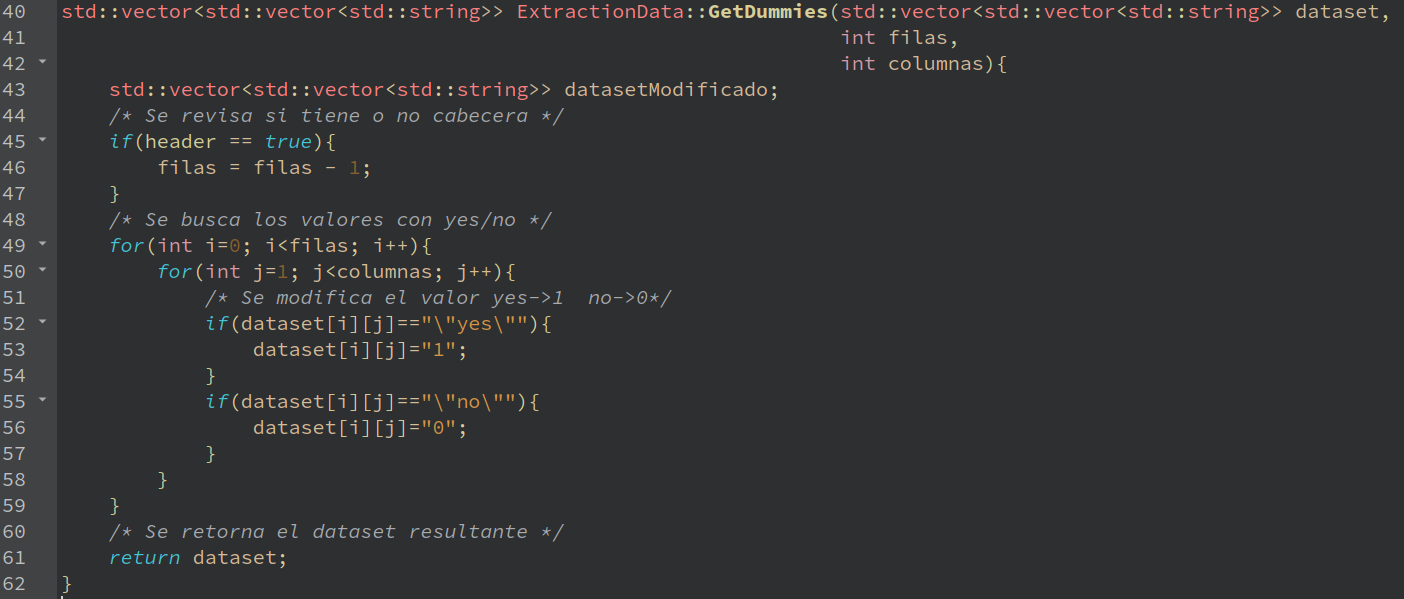

Como se puede observar la función recorre el dataset por medio de dos ciclos repetitivos señalando fila y columna, y en dado caso que encuentre un valor de tipo string con la cadena *yes* reemplazará dicho valor por un 1, y para el caso de encontrar una cadena *no* colocará un 0 en su lugar, para finalmente retornar el dataset final.

Posteriormente a la conversión de variables categóricas a numéricas hay que recordar que la primera columna debe ser eliminada puesto que es un identificador único y esto no aporta en el desarrollo de nuestro modelo regresivo, este procedimiento se llevará acabo en la función *CSVtoEigen* cuyo objetivo es convertir el dataset en una matriz de tipo Eigen para un manejo mucho mas sencillo.

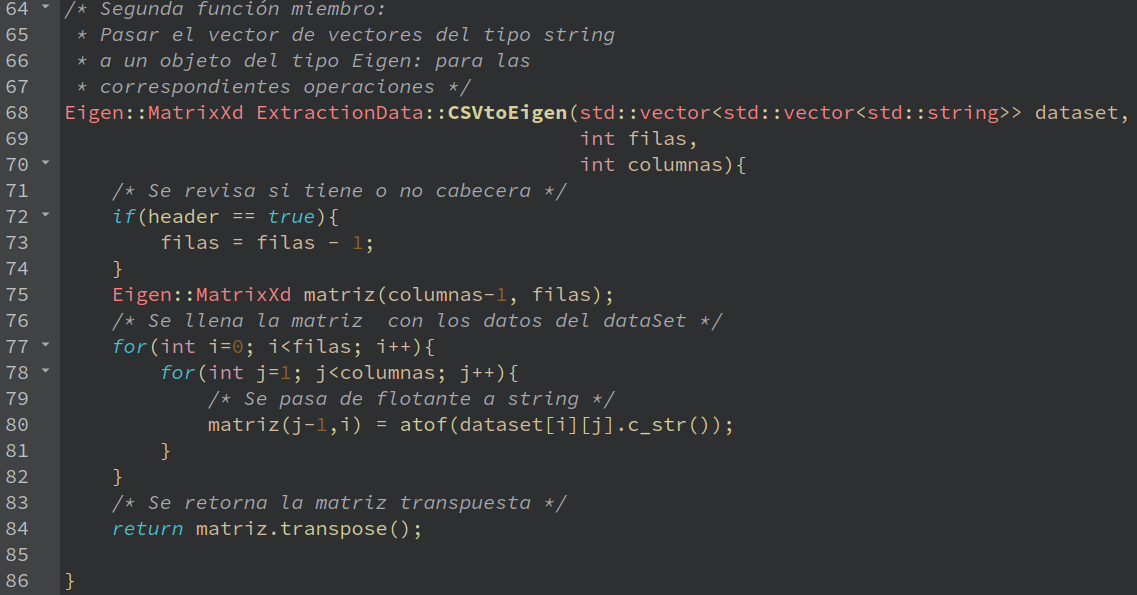

Como se puede observar en el ciclo repetitivo de *j* el cual recorre a cada columna se comenzará desde 1, esto quiere decir que la primera columna NO se tiene en cuenta para la creación de la matriz de tipo Eigen, de esta manera se eliminarán los identificadores únicos.

Una vez convertido el dataset a una matriz de tipo Eigen y eliminada la primera columna solo quedan dos pasos por realizar para poder ser manejado por el modelo regresivo, el primero será acomodar la matriz para que los precios queden al final, es decir en la última columna, esto se realizará para evitar posibles inconvenientes a la hora de aplicar el modelo, y posteriormente ya se procederá a la normalización de los datos.

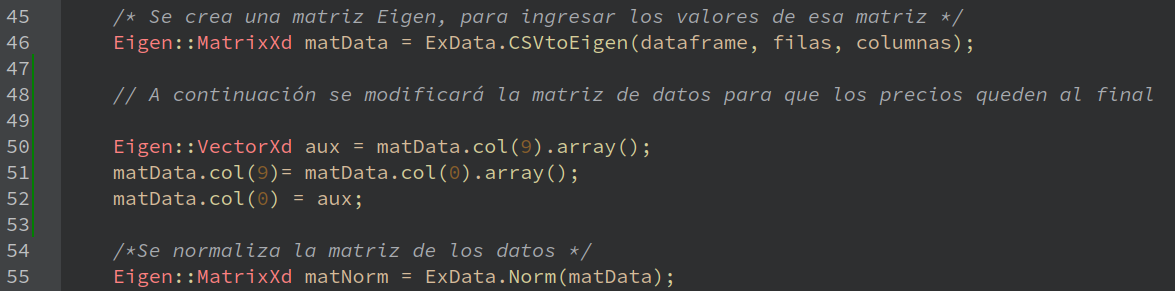

Como se logra ver en la línea 50 se declara una variable *aux* la cual alojará los valores de la última columna del dataset y está sera intercambiada con los valores de nuestra variable dependiente, de esta manera los precios de los computadores quedarán al final de la matriz. 

Una vez realizado todos los ajustes al dataset ya se puede aplicar la función de gradiente descendiente y obtener los valores de [Costos](https://github.com/juanpa54/HPC/blob/main/Parcial3/LinealRegresion/Archivos/costosPC.txt) y los coeficientes [Theta](https://github.com/juanpa54/HPC/blob/main/Parcial3/LinealRegresion/Archivos/thetasPC.txt) del modelo realizado.

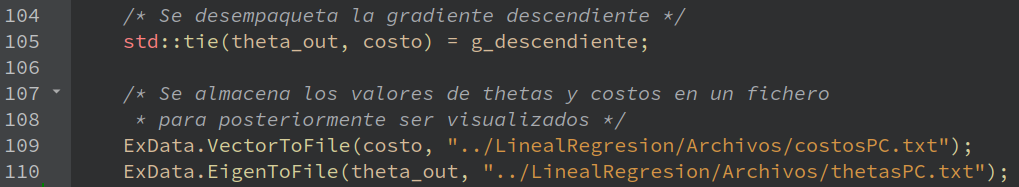

Con los valores arrojados por el gradiente descendiente, los promedios de las variables independientes se podrá calcular las predicciones hechas por el modelo, estas predicciones se guardaran en archivos tanto para [Train](https://github.com/juanpa54/HPC/blob/main/Parcial3/LinealRegresion/Archivos/predicciones_train.txt) como para [Test](https://github.com/juanpa54/HPC/blob/main/Parcial3/LinealRegresion/Archivos/predicciones_test.txt) y por último se aplicará la métrica de rendimiento (en este caso r2). A continuación se muestra el resultado de la ejecución.

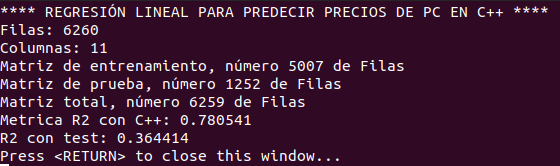

In [42]:
r2_Qt_train = 0.780541
r2_Qt_test = 0.364414

Como se puede observar se tiene un R2 de 0.78 para train y 0.36 para test.

### **5. Comparar/Analizar Resultados**

Para la comparación se leerán las predicciones realizadas por el modelo implementado en C++

In [43]:
y_est_Qt_train = pd.read_csv('https://raw.githubusercontent.com/juanpa54/HPC/main/Parcial3/LinealRegresion/Archivos/predicciones_train.txt', header=None)
y_est_Qt_test = pd.read_csv('https://raw.githubusercontent.com/juanpa54/HPC/main/Parcial3/LinealRegresion/Archivos/predicciones_test.txt', header=None)

A continuación se graficará una comparativa entre las predicciones para precios de computadores realizadas por los modelos de regresión lineal con C++ y Python, estas comparaciones se realizarán para train y para test.

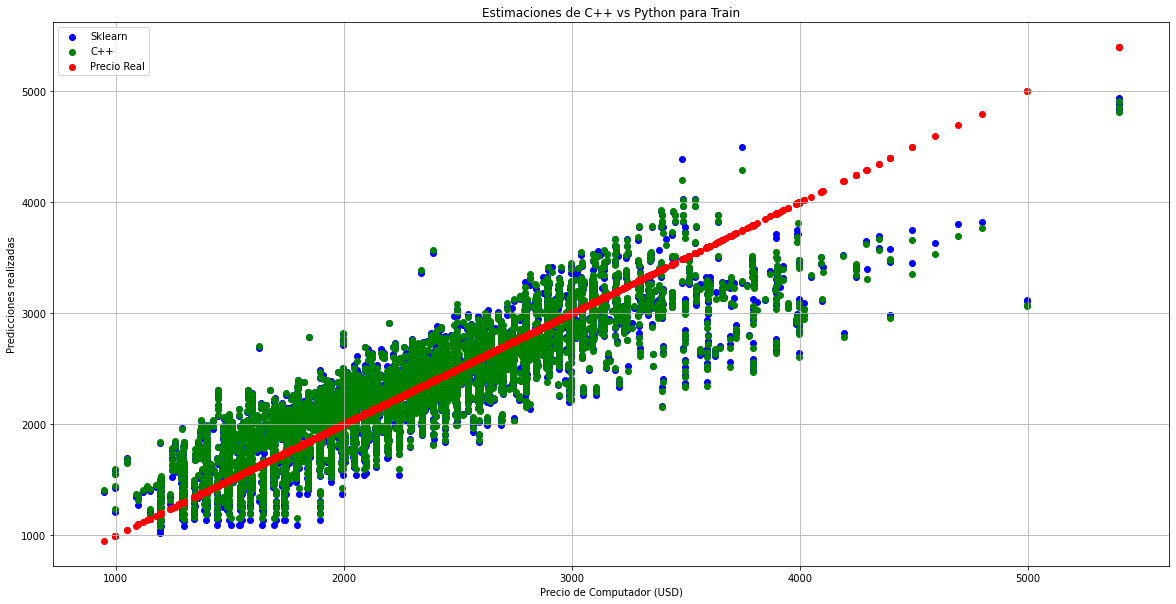

In [49]:
fig, axes = plt.subplots(figsize=(20,10))
plt.scatter(y_train,y_est_sklearn_train, c = 'b', label = 'Sklearn')
plt.scatter(y_train,y_est_Qt_train, c = 'g', label = 'C++')
plt.scatter(y_train,y_train, c = 'r', label = 'Precio Real')
plt.legend(loc=2)
plt.grid()
plt.title('Estimaciones de C++ vs Python para Train')
plt.xlabel('Precio de Computador (USD)')
plt.ylabel('Predicciones realizadas')
plt.show()

Se logra observar una tendencia de predicciones muy similares tanto en el caso de C++ como en Python, además se puede ver que en el intervalo de precios de aproximadamente 1200 a 3000 dólares se nota una aproximación cercana a los verdaderos precios en ambos casos, pero apartir de los 3500 dólares hay una gran dispersión en las predicciones y ambos modelos empiezan a tener un mayor error.

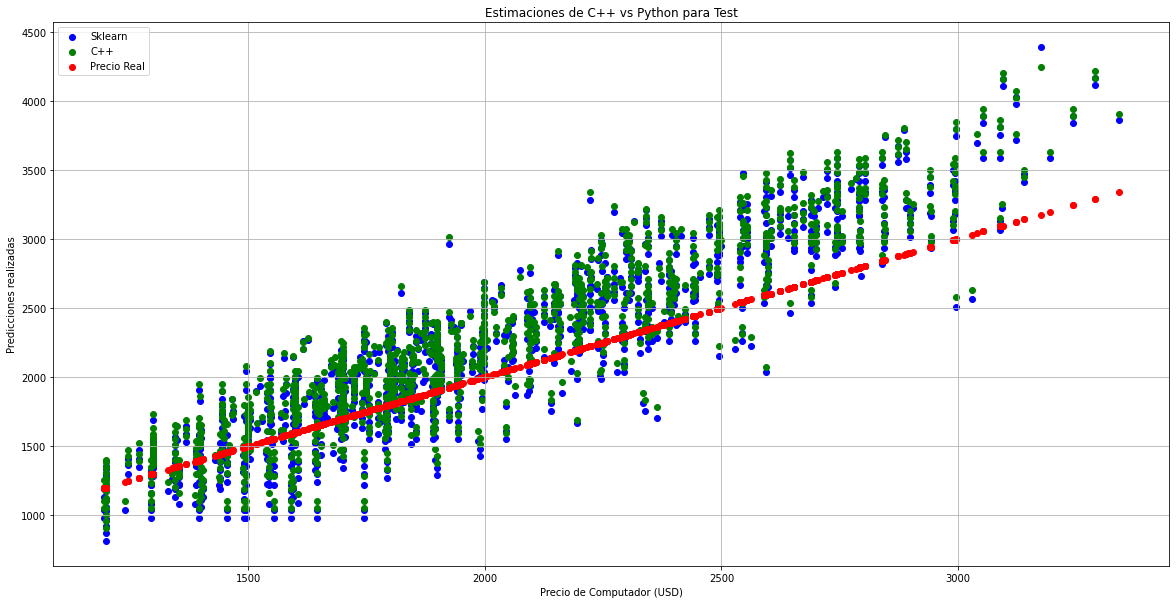

In [53]:
fig, axes = plt.subplots(figsize=(20,10))
plt.scatter(y_test,y_est_sklearn_test, c = 'b', label = 'Sklearn')
plt.scatter(y_test,y_est_Qt_test, c = 'g', label = 'C++')
plt.scatter(y_test,y_test, c = 'r', label = 'Precio Real')
plt.legend(loc=2)
plt.grid()
plt.title('Estimaciones de C++ vs Python para Test')
plt.xlabel('Precio de Computador (USD)')
plt.ylabel('Predicciones realizadas')
plt.show()

Como es de esperarse para el caso de Test se observa mcha mas dispersión en las predicciones de los precios puesto que no pertenecen a los datos con los que fue entrenado el modelo, a diferencia de las predicciones hechas por los modelos en train se observa que los precios predichos por C++ y python no se encuentran tan cercanos.

In [54]:
## Ahora se calculará la métrica de rendimiento para ambos modelos
print("TRAIN :")
print('Rendimiento con Sklearn:',r2_sklearn_train)
print('Rendimiento con C++:',r2_Qt_train)
print("TEST: ")
print('Rendimiento con Sklearn:',r2_sklearn_test)
print('Rendimiento con C++:',r2_Qt_test)

TRAIN :
Rendimiento con Sklearn: 0.7820376571614824
Rendimiento con C++: 0.780541
TEST: 
Rendimiento con Sklearn: 0.4322631086954798
Rendimiento con C++: 0.364414


In [65]:
print("Para el caso de train el modelo de Python es",round((r2_sklearn_train - r2_Qt_train) * 100 , 2),"% mejor que el de C++")
print("Para el caso de test el modelo de Python es",round((r2_sklearn_test - r2_Qt_test) * 100 , 2),"% mejor que el de C++")

Para el caso de train el modelo de Python es 0.15 % mejor que el de C++
Para el caso de test el modelo de Python es 6.78 % mejor que el de C++




---



##**Conclusiones**

- El modelo implementado en Python con la biblioteca Sklearn es mejor que el implementado en C++ tomando como referencia la métrica de rendimiento R2, pero no lo supera por un porcentaje significativo, es por esto que se concluye que el modelo de C++ sería mejor para una cantidad de datos mucho mayor, puesto que la optimización y costo computacional es un factor clave que entra en el mundo de la big data.

- La métrica de rendimiento R2 maneja una escalabilidad sencilla de entender y facil de comparar, puesto que al estar los valores entre 0 y 1 se tiene un punto de vista más claro del funcionamiento del modelo.

- Es importante realizar un ajuste y limpieza en los datos, puesto que de lo contrario se pueden generar diferentes inconvenientes a la hora de implementar un modelo.



##**Recomendaciones**

Se recomienda la el sitio web [kaggle](https://www.kaggle.com/) ya que allí se puede encontrar una gran cantidad de datasets de todas las temáticas y de esta manera se puede practicar y adentrarse en el mundo del Machine Learning.

##**Referencias**

- Basic Computer Data. (2017, 5 mayo). Kaggle. https://www.kaggle.com/datasets/kingburrito666/basic-computer-data-set?resource=download Data, S. B. (2019, 24 diciembre).
 
- Aprendizaje automático: como seleccionar métricas de regresión. sitiobigdata.com. https://sitiobigdata.com/2019/05/27/aprendizaje-automatico-seleccionando-metricas-regresion/ 

- pandas.read_csv — pandas 1.5.2 documentation. (s. f.). https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html